# Sample parametric function

Plots 10 samples of the parametric function.

In [1]:
import torch
from pyro import distributions
from pyro.nn import PyroSample, PyroModule
import matplotlib.pyplot as plt

In [2]:
class ParametricMeanFn(PyroModule):
    
    def __init__(self):
        super().__init__()
        
        self.beta = PyroSample(distributions.Uniform(-100, 100))
        
    def forward(self, X):
        
        middle = 383.0
        X_adjusted = X - middle
        
        result = torch.pow(X_adjusted + self.beta, 2) / middle**2 - 1
              
        return result.squeeze()


In [3]:
param = ParametricMeanFn()

In [4]:
x_space = torch.linspace(0, 765, 766)

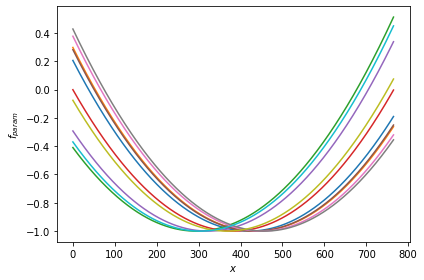

In [6]:
for i in range(10):
    plt.plot(x_space, param(x_space))

plt.xlabel('$x$')
plt.ylabel('$f_{param}$')
plt.tight_layout()
plt.savefig('parametric_functions.png', dpi=300)